In [7]:
import cv2
import pandas as pd
from matplotlib import pyplot as plt
import os
import numpy as np
from sklearn.model_selection import train_test_split
%matplotlib inline

In [8]:
data_path = 'C:\\Users\\P V S Karthik\\projects\\Cerium_Systems_projects\\My_Sol\\'
# we'll use data from two folders
shelf_images = 'D:\\images\\part02\\ShelfImages\\'
product_images = 'D:\\images\\part02\\ProductImagesFromShelves\\'

In [9]:
# let's get products on shelves photo from ProductImagesFromShelves
df2_products = pd.DataFrame(
    [[f[:18], f[:6], f[7:14], i, *map(int, f[19:-4].split('_'))] 
     for i in range(10) 
     for f in os.listdir(f'{product_images}{i}') if f.endswith('png')],
    columns=['file', 'shelf_id', 'planogram_id', 
             'category', 'xmin', 'ymin', 'w', 'h'])
# convert from width height to xmax, ymax
df2_products['xmax'] = df2_products['xmin'] + df2_products['w']
df2_products['ymax'] = df2_products['ymin'] + df2_products['h']
df2_products.head()

,file,shelf_id,planogram_id,category,xmin,ymin,w,h,xmax,ymax
0,C1_P01_N1_S2_1.JPG,C1_P01,N1_S2_1,0,1008,1552,252,376,1260,1928
1,C1_P01_N1_S2_1.JPG,C1_P01,N1_S2_1,0,1028,928,252,376,1280,1304
2,C1_P01_N1_S2_1.JPG,C1_P01,N1_S2_1,0,24,872,244,392,268,1264
3,C1_P01_N1_S2_1.JPG,C1_P01,N1_S2_1,0,280,1568,252,376,532,1944
4,C1_P01_N1_S2_1.JPG,C1_P01,N1_S2_1,0,292,872,252,376,544,1248


In [10]:
# let's get all shelves photo data from ShelfImages
jpg_files = [f for f in os.listdir(f'{shelf_images}') if f.endswith('JPG')]
df1_photos = pd.DataFrame([[f, f[:6], f[7:14]] for f in jpg_files], 
                         columns=['file', 'shelf_id', 'planogram_id'])
df1_photos.head()

,file,shelf_id,planogram_id
0,C1_P01_N1_S2_1.JPG,C1_P01,N1_S2_1
1,C1_P01_N1_S2_2.JPG,C1_P01,N1_S2_2
2,C1_P01_N1_S3_1.JPG,C1_P01,N1_S3_1
3,C1_P01_N1_S3_2.JPG,C1_P01,N1_S3_2
4,C1_P01_N1_S5_1.JPG,C1_P01,N1_S5_1


In [11]:
df2_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13109 entries, 0 to 13108
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   file          13109 non-null  object
 1   shelf_id      13109 non-null  object
 2   planogram_id  13109 non-null  object
 3   category      13109 non-null  int64 
 4   xmin          13109 non-null  int64 
 5   ymin          13109 non-null  int64 
 6   w             13109 non-null  int64 
 7   h             13109 non-null  int64 
 8   xmax          13109 non-null  int64 
 9   ymax          13109 non-null  int64 
dtypes: int64(7), object(3)
memory usage: 1.0+ MB


In [12]:
df1_photos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   file          354 non-null    object
 1   shelf_id      354 non-null    object
 2   planogram_id  354 non-null    object
dtypes: object(3)
memory usage: 8.4+ KB


1. Both data frames... df1_photos and df2_products has 0 null or missing values.

In [13]:
# getting the shelf image files seperately in a list based on their id's
shelves = list(set(df1_photos['shelf_id'].values))

# use train_test_split from sklearn to split the test and validation parts of the data...
shelves_train, shelves_validation, _, _ = train_test_split(
    shelves, shelves, test_size=0.3, random_state=6)

# marking all records with is_train tag in the name so that it will be easy to recon with...
def is_train(shelf_id): return shelf_id in shelves_train
df1_photos['is_train'] = df1_photos.shelf_id.apply(is_train)
df2_products['is_train'] = df2_products.shelf_id.apply(is_train)

In [14]:
# saving the data to a pkl(pickle files..) file to access into the model.
df1_photos.to_pickle(f'{data_path}photos.pkl')
df2_products.to_pickle(f'{data_path}products.pkl')

In [15]:
# Using the bellow function we are going to map the products in the products list with the products
# in the images shown... we are also going to include the rectangle boxes around them..
# this function is just for our understanding of the preprocessing we did as of now.
def draw_shelf_photo(file):
    file_products_df = df2_products[df2_products.file == file]
    coordinates = file_products_df[['xmin', 'ymin', 'xmax', 'ymax']].values # getting req data
    im = cv2.imread(f'{shelf_images}{file}')
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)    
    for xmin, ymin, xmax, ymax in coordinates: # we are using these co ords to map
        cv2.rectangle(im, (xmin, ymin), (xmax, ymax), (0, 255, 0), 5) # puttign rectangle around them 
    plt.imshow(im)

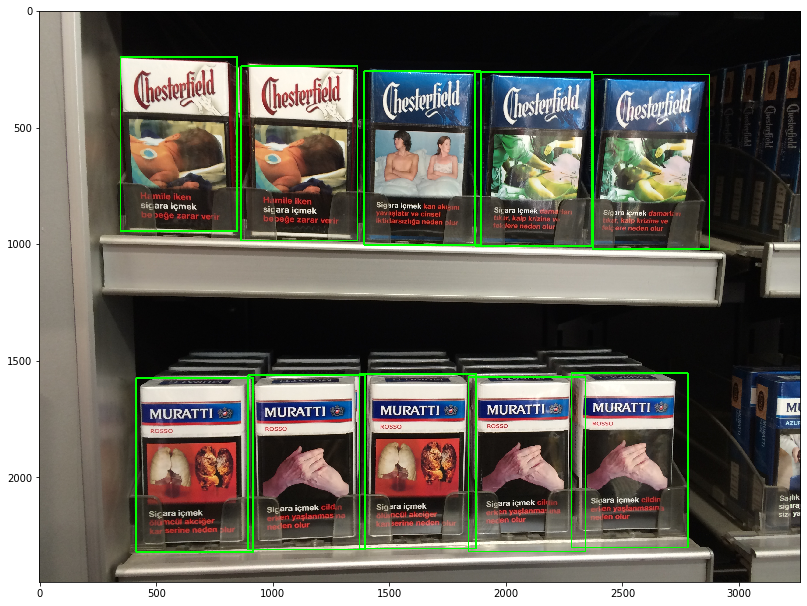

In [17]:
# draw one photo to check our data
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
draw_shelf_photo('C1_P01_N1_S2_2.JPG')